In [4]:
from scipy import optimize, arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

## Utility for a consumer and the demand function

We assume that consumers will either buy one unit or none. We have $n$ consumers, and a consumer $n$ can either buy the product at a price $n-p$ or choose not to buy a product and get utility $0$. We thus have that the outside option for not buying is $0$ so a consumer will buy if $n-p\geq0$. The piece of code in the next line defines that.

In [5]:
def u(n,p): # the utility of a consumer with valuation of the good at n.
    return n-p

consumer_types = arange(0.0,1.01,0.01) #we start at 0.0 and end at 1.01 with evently spaced consumers with a space of 0.01

def buy(n,p):
    if u(n,p)>=0:
        buy=1.0
    else:
        buy=0.0
    return buy

def total_demand(p):
    demand_vector = [buy(n,p)/len(consumer_types) for n in consumer_types]
    return sum(demand_vector)

## Competition in a Bertrand model.
In a Bertrand model, firms compete by setting prices and not quantities. In a Bertrand setting we will have that the firm with lowest prices will sell to all consumers. We can write this up as:

$$\pi_1(p_1,p_2)=\begin{cases} 0 \quad if p_1>p_2 \\ \frac{1}{2}*x(p_1)(p_1-c_1) \quad if p_1=p_2 \\ x(p_1)*(p_1-c_1)\quad if p_1<p_2 \end{cases}$$

So if the price of the competing firm is lower than yours (and higher than your marginal cost) you would have an incentive to decrease your price and gain a larger profit.

In [22]:
def profit(p1,p2,c1):
    if p1>p2:
        profits=0
    elif p1==p2:
        profits = 0.5*total_demand(p1)*(p1-c1)
    else:
        profits= total_demand(p1)*(p1-c1)
    return profits

# we are here stating that if p1>p2, then we have 0 profits. If prices are identical then they share the total demand equally
# and if those two statements are not fulfilled then that must mean that p1<p2 and firm 1 will therefore
# gain all profits from the market.

def reaction(p2,c1):
    if p2>c1:
        reaction = c1+0.8*(p2-c1)
    else:
        reaction = c1
    return reaction

## Finding the equilibrium in the model

In [23]:
def vector_reaction(p,param):
    return array(p)-array([reaction(p[1],param[0]),reaction(p[0],param[1])])

param = [0.0,0.0] # we assume that c1=c2=0
p0 = [0.5,0.5] #our initial guesses for the prices p1 and p2 is equal to 0.5

ans = optimize.fsolve(vector_reaction, p0, args = (param))
print(ans)

[5.e-324 5.e-324]


As expected we find that $p_1=p_2=c_1=c_2=0$ which is the standard result in a Bertrand model. The reason is that firms will underbid each other until they set prices equal to marginal costs, and since we assumed that $c_1=c_2=0$ we will therefore naturally find that prices should be equal to $0$.

## Extension of the model: Collusion

Der skal stå noget mere men virksomheden vil collude hvis:
$$\pi(x,x)\frac{1}{1-\delta}\geq(1-\delta)\pi(\bar{x},x)+\frac{\delta}{1-\delta}\pi(x,x)$$
So they will collude if the increase in profits that they gain from deviating from the equilibrium strategy, is greater than the profits they would have from not deviating from the equilibrium strategy (skal uddybes mere).

We will focus on a case where $c_1=c_2=c$ and prices are identical $p_1=p_2=p$.

In [26]:
def collusion_profits(p,c,delta):
    profits = profit(p,p,c)
    ans = optimize.fsolve(vector_reaction,p0, args=([c,c]))
    if profits >= (1-delta)*2*profits+delta*profit(ans[0],ans[1],c):
        industry_profit = 2*profits
    else:
        industry_profit = 0
    return industry_profit


(0.0, 0.2)

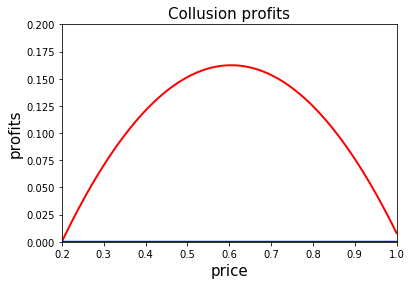

In [30]:
c = 0.2 # We assume c=0.2
range_p = arange(0.0,1.01,0.01)
delta1=0.9
delta2=0.2

range_profits = [collusion_profits(p,c,delta1) for p in range_p]
range_profits_2 = [collusion_profits(p,c,delta2) for p in range_p]

plt.clf()
plt.plot(range_p, range_profits,'-', color = 'r', linewidth = 2)
plt.plot(range_p, range_profits_2,'-', color = 'b', linewidth = 2)
plt.title("Collusion profits",fontsize = 15)
plt.xlabel("price",fontsize = 15)
plt.ylabel("profits",fontsize = 15,rotation = 90)
plt.xlim(c,1.0)
plt.ylim(0.0,0.2)


We see here that collusion is not a possibility when $\delta=0.4$ but when $\delta=0.9$ it is possible to collude. The price that gives the highest profit is around $0.6$